In [1]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt

from transformers import pipeline

import utils as ute

C:\Users\jllanes\Desktop\Proyectos\DialogueSummaries\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_df_list = []
for f in os.listdir("Conversations/"):
    df = pd.read_excel("Conversations/" + f)
    if df.shape[0] > 4:
        all_df_list.append(df)
        
df_all = pd.concat(all_df_list).reset_index(drop=True)

In [3]:
whole_text = ". ".join(df_all["message"])

In [4]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ 
New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. 
Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, 
she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," 
referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, 
Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly 
sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, 
with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. 
She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, 
who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and 
the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including 
Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by 
the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [5]:
print("Number of words", len(ARTICLE.split()))

Number of words 369


In [6]:
summary = summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)
print(summary)

[{'summary_text': 'Liana Barrientos has been married 10 times, nine of them between 1999 and 2002. Prosecutors say the marriages were part of an immigration scam. She pleaded not guilty to two counts of "offering a false instrument for filing in the first degree"'}]


In [7]:
summary[0]['summary_text']

'Liana Barrientos has been married 10 times, nine of them between 1999 and 2002. Prosecutors say the marriages were part of an immigration scam. She pleaded not guilty to two counts of "offering a false instrument for filing in the first degree"'

In [9]:
my_text = whole_text

max_len_summary = 130
num_iter = 10
num_words_by_step = int( (len(my_text.split())-max_len_summary)/num_iter)

result_list = []
for i in range(num_iter):
    
    try:
    
        print("Iteration", i, "of", num_iter, end="\r")

        num_words_take = max_len_summary + i*num_words_by_step
        my_new_text = " ".join(my_text.split()[: num_words_take])

        t0 = time.time()
        output_summary = summarizer(my_new_text, max_length=130, min_length=30, do_sample=False)
        delta_time = time.time() - t0

        result_list.append({
            "DeltaTime": delta_time,
            "NumWords": num_words_take,
            "Summary": output_summary[0]['summary_text']
        })
    except:
        pass
    
df_res = pd.DataFrame(result_list)

Correlation value 0.7410505677951653
P-value -
Coefficients: 
 [0.00834725] 
Intercept: 
 4.471854551978732
R-square: 0.55


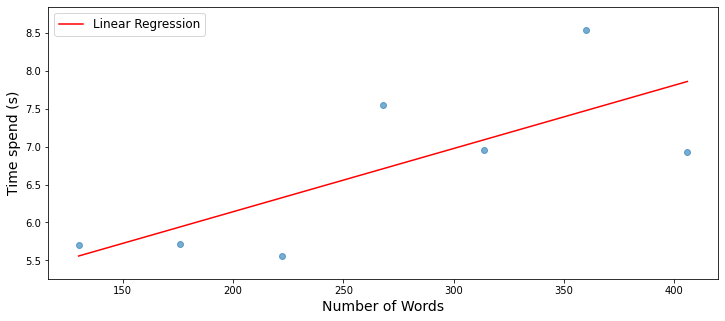

In [11]:
ute.make_scatter_plot(df=df_res, 
                      x_feat="NumWords", 
                      x_name="Number of Words", 
                      y_feat="DeltaTime", 
                      y_name="Time spend (s)")

### Evaluate how accurate is the summary

In [12]:
summary = summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)
summary_text = summary[0]['summary_text']